# Task 1.1 Data Understanding
*Alberto Roberto Marinelli, Giacomo Cignoni, Alessandro Bucci*
## Importing Libraries
First we import the libraries necessary to analyze the data

In [26]:
import math
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import decomposition

Then we load the datasets

In [27]:
df_tweets = pd.read_csv('./dataset/tweets.csv', sep=',', index_col=0)  # load tweets
df_users = pd.read_csv('./dataset/users.csv', sep=',', index_col=0)  # load users

## Information about the datasets
The user dataset is composed of 6 columns: id, name, lang, bot, created_at and statuses_count

In [28]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [29]:
df_users

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0
...,...,...,...,...,...
2911861962,Madrid Lae Maika .,en,0,2019-11-29 13:16:02,1126.0
1378532629,Clau Sato,en,0,2018-04-27 03:01:58,3024.0
126984069,ALMA LETICIA NUÑO,es,0,2015-03-29 17:01:24,6.0


The tweets dataset is composed of 10 columns: id, user_id, retweet_count, reply_count, favorite_count, num_hashtags, num_urls, num_mentions, created_at and text

In [30]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 509354017856950272 to 2312918930458324
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         971 non-null    object
 1   retweet_count   959 non-null    object
 2   reply_count     949 non-null    object
 3   favorite_count  951 non-null    object
 4   num_hashtags    913 non-null    object
 5   num_urls        947 non-null    object
 6   num_mentions    937 non-null    object
 7   created_at      1000 non-null   object
 8   text            961 non-null    object
dtypes: object(9)
memory usage: 78.1+ KB


In [31]:
df_tweets

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!
...,...,...,...,...,...,...,...,...,...
526638475425382400,466308751,1,0,0,0,0,0,2019-10-29 07:36:11,"""Essere fuori e dimenticarsi di tutti i proble..."
590385348871643136,175418591,0,0,1,0,0,0,2020-04-22 05:23:30,STOP SYING GNARLY
aay,614313057,2,0.0,3.0,0.0,0.0,gt95f,2019-02-27 10:30:56,"Chi ti vuole,ti cerca. Chi ti ama,ti trova. Ch..."


We found out that some user_ids in the tweets were NaN or a different type rather than int, it means that we would not be able to join them with the user dataset, so we decided to drop them out of the dataframe.

In [32]:
df_tweets['user_id'] = pd.to_numeric(df_tweets['user_id'], downcast= 'integer', errors='coerce') # After this instruction the column becomes numerics
                                                                                                 # The coerce option converts all types != int in NaN
df_tweets.drop(df_tweets[df_tweets['user_id'].isnull()].index, inplace=True) # Drop NaN in col 'user_id'
df_tweets['user_id'] = df_tweets['user_id'].astype('Int64', errors='ignore') # Cast to int

df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 509354017856950272 to 587485987414155264
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         956 non-null    Int64 
 1   retweet_count   925 non-null    object
 2   reply_count     921 non-null    object
 3   favorite_count  919 non-null    object
 4   num_hashtags    892 non-null    object
 5   num_urls        912 non-null    object
 6   num_mentions    910 non-null    object
 7   created_at      956 non-null    object
 8   text            927 non-null    object
dtypes: Int64(1), object(8)
memory usage: 75.6+ KB


Now we give a look at the heatmap to show all the missing values

<AxesSubplot:ylabel='id'>

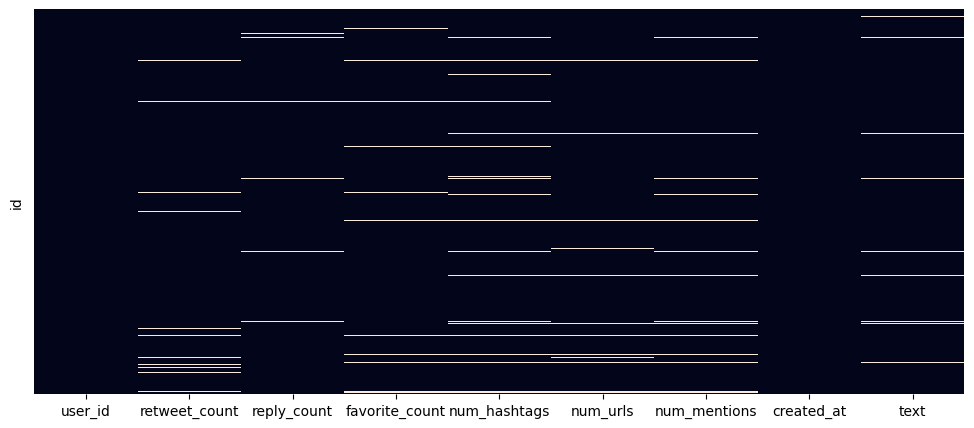

In [33]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)

## Features informations:
### Users dataset
id, name, lang, bot, created_at and statuses_count
* **id**
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer.
* **name**
  * Type: **String**
  * Description: The name of the user.
* **lang**
  * Type: **Int32**
  * Description: The user’s language selected
* **bot**
  * Type: **Boolean**
  * Description: A binary variable that indicates if a user is a bot or a genuine user
* **created_at**
  * Type: **Datetime64**
  * Description: The timestamp of when the user was created
* **statuses_count**
  * Type: **Int32**
  * Description: The count of the tweets made by the user at the moment of data crawling.
### Tweets dataset
* **id**
  * Type: **Object**
  * Description: Is the identifier of the single tweet, it should be int64, but we decided to consder it object because it does not affect the data if it is not an integer.
* **user_id**
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer
* **retweet_count**
  * Type: **Int32**
  * Description: The number of retweets of the single tweet
* **reply_count**
  * Type: **Int32**
  * Description: The number of replies of the single tweet
* **favorite_count**
  * Type: **Int32**
  * Description: The number of favorites (or likes) of the single tweet
* **num_hashtags**
  * Type: **Int32**
  * Description: The number of hashtags in the single tweet
* **num_urls**
  * Type: **Int32**
  * Description: The number of urls in the single tweet
* **num_mentions**
  * Type: **Int32**
  * Description: The number of mentions in the single tweet
* **created_at**
  * Type: **Datetime64**
  * Description: The timestamp of when the single tweet was created
* **text**
  * Type: **String**
  * Description: The text of the single tweet